In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler#표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler#정규화
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)



In [3]:
df = pd.read_csv('../csv-data/predictive_maintenance.csv')

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


### EDA

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


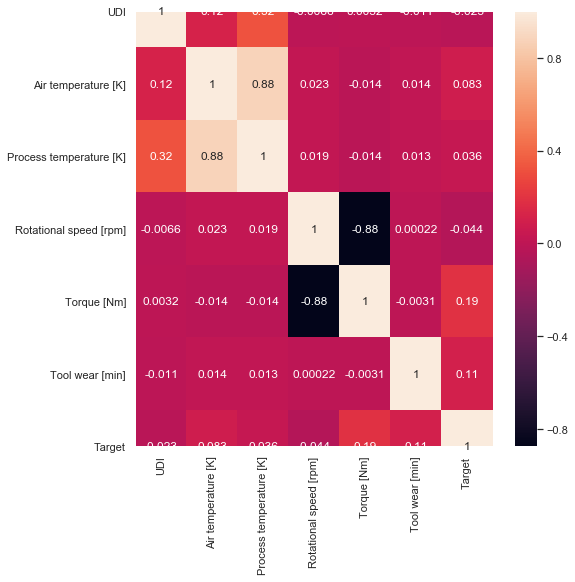

In [6]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

In [7]:
data=list(set(df['Failure Type'].values))
data

['Heat Dissipation Failure',
 'Tool Wear Failure',
 'Overstrain Failure',
 'Power Failure',
 'No Failure',
 'Random Failures']

In [8]:
encoder=LabelEncoder()
encoder.fit(data) 
df['Failure Type']=encoder.transform(df['Failure Type'])
df['Failure Type'] = df['Failure Type'].astype('category')

In [9]:
a= set(df['Type'].values)
value= list(a)
value
encoder1=LabelEncoder()
encoder1.fit(value) 
df['Type']=encoder1.transform(df['Type'])
df['Type'] = df['Type'].astype('category')

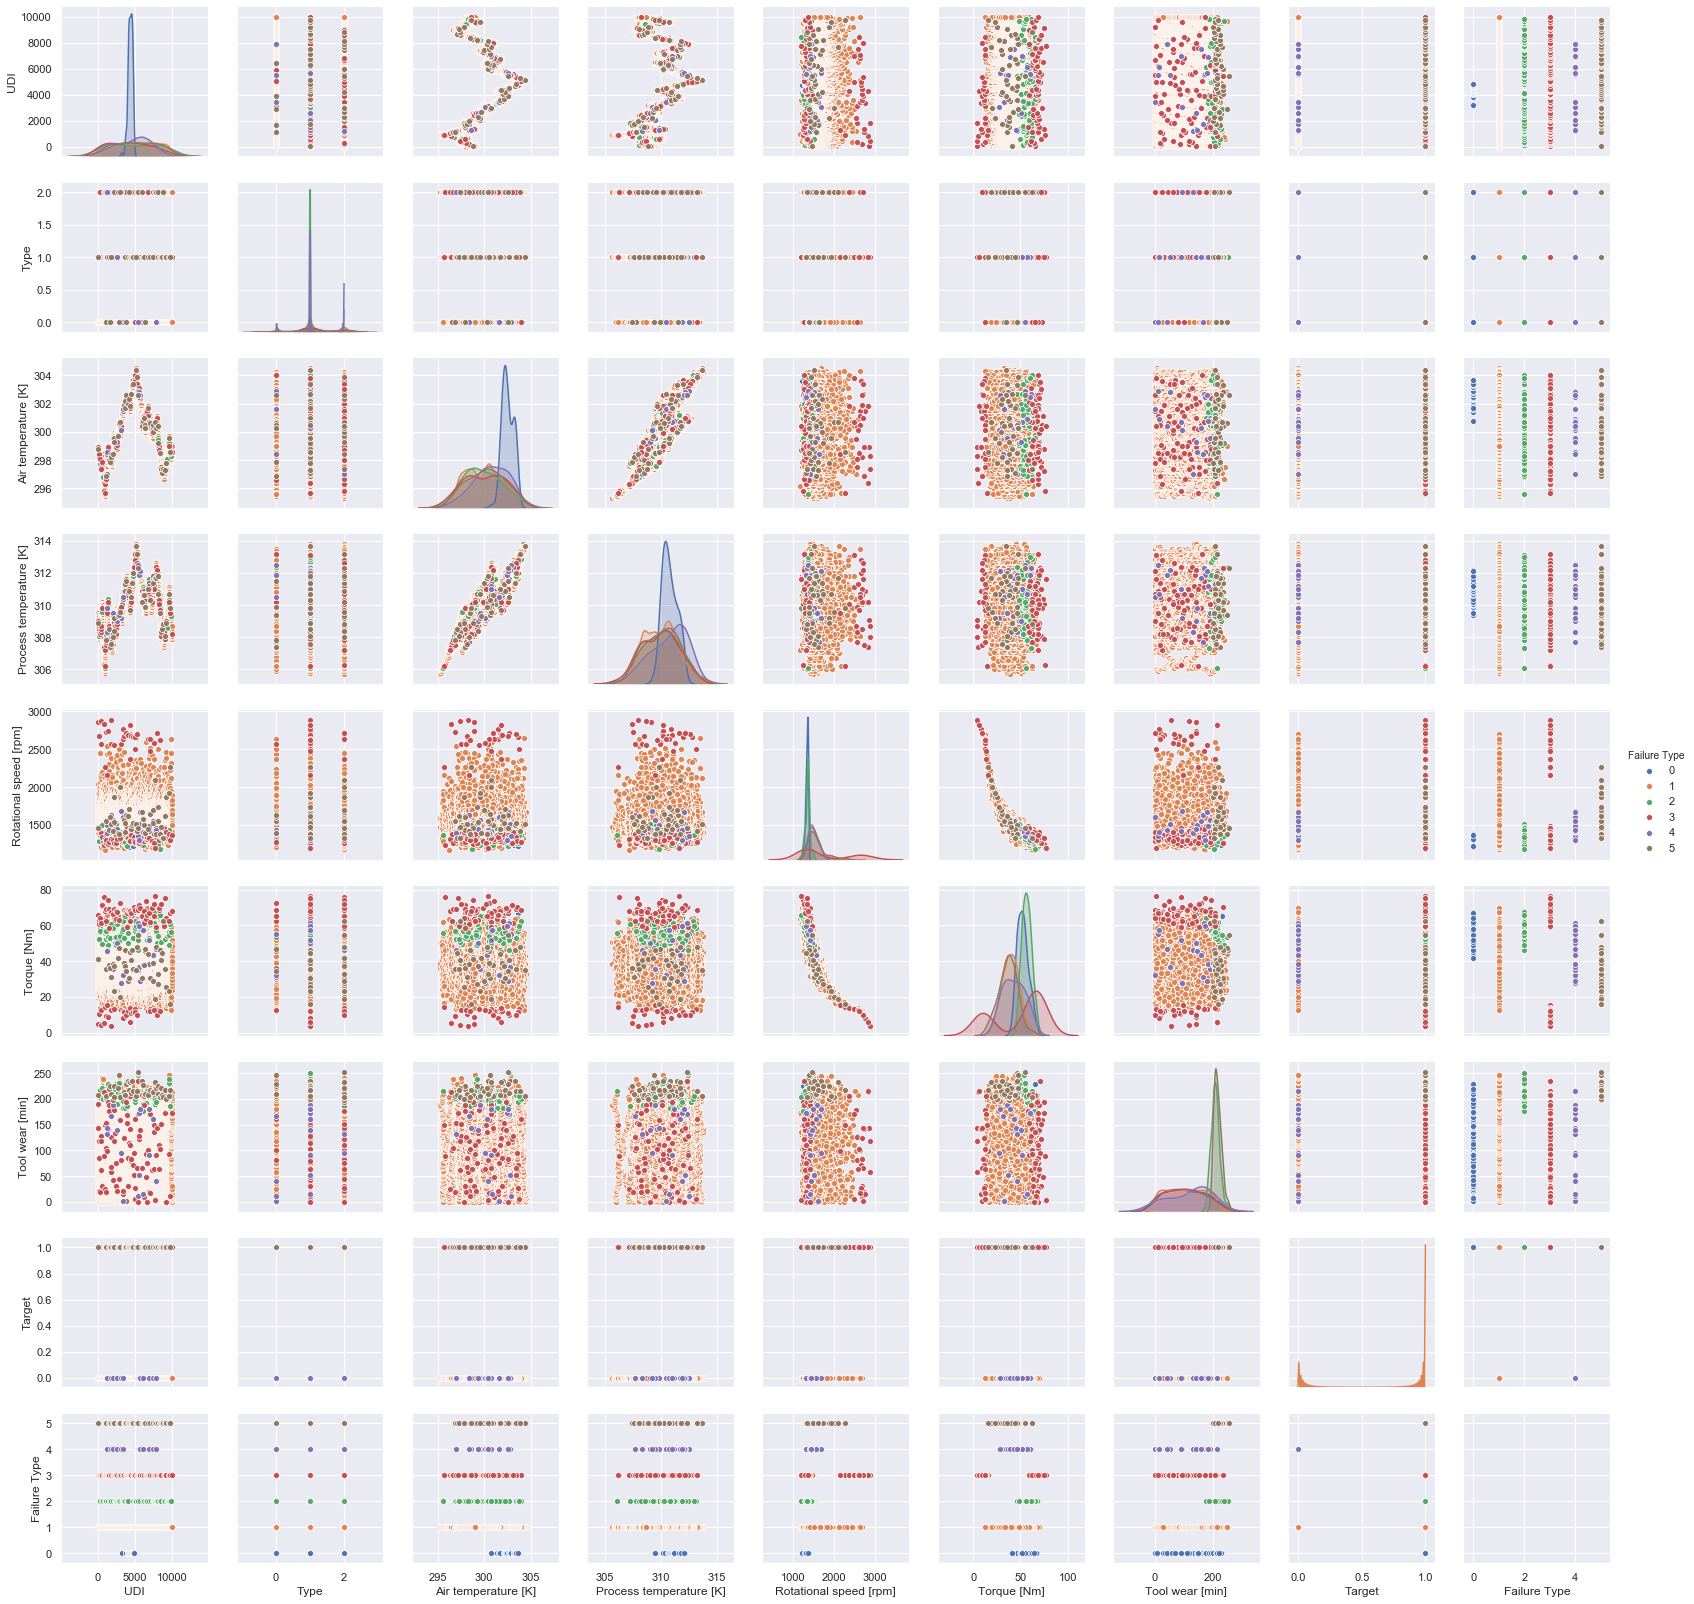

In [10]:
sns.pairplot(df, hue='Failure Type')

In [11]:
df.drop(columns=["UDI", "Product ID", "Type", "Target", "Torque [Nm]"], inplace=True)

In [12]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Failure Type
0,298.1,308.6,1551,0,1
1,298.2,308.7,1408,3,1
2,298.1,308.5,1498,5,1
3,298.2,308.6,1433,7,1
4,298.2,308.7,1408,9,1
...,...,...,...,...,...
9995,298.8,308.4,1604,14,1
9996,298.9,308.4,1632,17,1
9997,299.0,308.6,1645,22,1
9998,299.0,308.7,1408,25,1


In [13]:
#train , test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=3)

#포지션이 target. 

In [14]:
encoder.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype='<U24')

In [15]:
df.groupby('Failure Type').size()

Failure Type
0     112
1    9652
2      78
3      95
4      18
5      45
dtype: int64

Heat Dissipation Failure : 112      ===> 0
No Failures              : 9652     ===> 1
Overstrain Failure       : 78       ===> 2
Power Failure            : 95       ===> 3
Random Failures          : 18       ===> 4
Tool Wear Failure        : 45       ===> 5     

### 모델 선정=>cross-valication
KNN, SVM, DECISIONTREE 중 교차 검증으로 ... 


In [16]:
df_clf = DecisionTreeClassifier(random_state=11)
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
how = [df_clf, knn_clf, svc_clf]

In [17]:
def print_metrics(model, x, y,m=10):
    
    scores = cross_val_score(model, x,y, cv=m)
    acc_mean = np.mean(scores)
    print("교차검증결과: {}".format(scores))
    print("교차검증결과: {:.2f}".format(np.mean(scores)))
    
    return scores, acc_mean
    

In [18]:
model_names=[]
result=[]
result_mean=[]
for i in how:
    a=str(i)
    
    print("-------------------------------------"+a[: a.find("(")]+"---------------------------------")
    gg=print_metrics(i, X_train, y_train, 10)
    model_names.append(a[: a.find("(")])
    result.append(gg[0])
    result_mean.append(gg[1])
    
print(result)
print(result_mean)
print(model_names)

-------------------------------------DecisionTreeClassifier---------------------------------
교차검증결과: [0.94769614 0.95765878 0.94389027 0.9525593  0.95875    0.965
 0.96       0.96863237 0.96988708 0.96110414]
교차검증결과: 0.96
-------------------------------------KNeighborsClassifier---------------------------------
교차검증결과: [0.96513076 0.96388543 0.97007481 0.96004994 0.97       0.96625
 0.96875    0.96988708 0.97239649 0.96988708]
교차검증결과: 0.97
-------------------------------------SVC---------------------------------
교차검증결과: [0.96388543 0.96388543 0.96508728 0.9650437  0.96625    0.96625
 0.96625    0.96988708 0.96988708 0.96988708]
교차검증결과: 0.97
[array([0.94769614, 0.95765878, 0.94389027, 0.9525593 , 0.95875   ,
       0.965     , 0.96      , 0.96863237, 0.96988708, 0.96110414]), array([0.96513076, 0.96388543, 0.97007481, 0.96004994, 0.97      ,
       0.96625   , 0.96875   , 0.96988708, 0.97239649, 0.96988708]), array([0.96388543, 0.96388543, 0.96508728, 0.9650437 , 0.96625   ,
       0.96

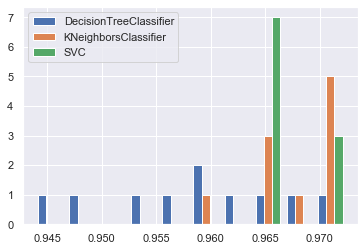

In [19]:
plt.hist(result, label=model_names)
plt.legend()

### 하이퍼 파라메터=>grid search

In [20]:
def grid_search(model, params, k=5):
    gs= GridSearchCV(model, params, cv=k)
    gs.fit(X_train, y_train)
    print(gs)
    print("Best Parameters : ", gs.best_params_)
    print("Best Score : ", gs.best_score_)
    print("Best Test Score : ", gs.score(X_test, y_test))
    return gs

In [21]:
grid_params={
    "criterion":["gini", "entropy"], "max_depth":[3,5,7,9], "random_state": [1,3,5]
}

In [22]:
grid_search(df_clf, grid_params, k=5)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9], 'random_state': [1, 3, 5]},

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9], 'random_state': [1, 3, 5]},

In [23]:
best_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 3)
best_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [24]:
best_model.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [25]:
#정확도 체크, acc, recall, precision, f1-score  ===> confusionMatrix

In [41]:
pred=None
def print_test_metrics(model, X_test):
    global pred
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

In [42]:
print_test_metrics(best_model, X_test)

*** Test Accuracy *** 
   0.968

*** Confusion Matrix *** 
 [[  17    8    0    0    0    0]
 [   1 1902   16    0    0    0]
 [   0   10   11    0    0    0]
 [   1   14    2    6    0    0]
 [   0    4    0    0    0    0]
 [   0    7    1    0    0    0]]
*** Confusion Matrix(precision) ***
0.5398825899367098
***classification re(precision) ***
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.98      0.99      0.98      1919
           2       0.37      0.52      0.43        21
           3       1.00      0.26      0.41        23
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8

    accuracy                           0.97      2000
   macro avg       0.54      0.41      0.43      2000
weighted avg       0.96      0.97      0.96      2000

